<a href="https://colab.research.google.com/github/jjsalaza/Ingenieria-Logistica-ULL/blob/master/logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingeniería Logística, Grado de Informática, Universidad de La Laguna
---



# Introducción

Principalmente aprendemos a representar problemas reales mediante modelos matemáticos de programación lineal (continua o entera), es decir, del tipo $\max\{ c^Tx: Ax\leq b, x\in Z^n\}$. Luego estos modelos matemáticos serán resueltos mediante herramientas informáticas especializadas, como [Cplex](https://www.ibm.com/analytics/cplex-optimizer), [Xpress](http://www.fico.com/es/products/fico-xpress-optimization), Gurobi, SCIP, GLKP, CBC, GLOP, etc. Aunque dedicamos algo a comprender las metodologías implementadas en estas herramientas, principalmente la asignatura insistirá en la modelización de problemas.


Un ejemplo de modelo matemático es:
\begin{eqnarray}
\max\;\; x+10y& & \\
x+7y&\leq& 17.5  \\
x &\leq& 3.5  \\
x,y&\in& Z
\end{eqnarray}

A fín de no complicarnos con la instalación de licencias comerciales, usamos una librería de optimización de software libre que permite ser llamada desde Python y que ha sideo desarrollada en el proyecto [COIN-OR](https://www.coin-or.org/). Se llama CBC. Además en este mismo proyecto existe un lenguaje que amplía el Python y se llama [PuLP](https://www.coin-or.org/PuLP/). Usando este lenguaje el modelo anterior se resuelve mediante:


In [1]:
!pip install pulp
from pulp import *

prob = LpProblem("MiPrimerProblemaEntero", LpMaximize)
X = LpVariable("X", 0, None,cat='Integer')
Y = LpVariable("Y", 0, None,cat='Integer')
prob += X + 10 * Y
prob += X + 7 * Y <= 17.5
prob += X <= 3.5

prob.solve()

print("Status = ", LpStatus[prob.status])
print("Optimal objective value = ", value(prob.objective))
print("  X = ", X.varValue)
print("  Y = ", Y.varValue)
# prob.writeLP("modelo.lp")
# print(prob)

Status =  Optimal
Optimal objective value =  23.0
  X =  3.0
  Y =  2.0


En este lenguaje PuLP podemos usar varias librerias de optimización. Por defecto usa la de COIN-or. Pero podemos elegir otras usando por ejemplo:
\begin{verbatim}
if liberia == "GUROBI":
			prob.solve(GUROBI(TimeLimit=60,msg=1))
		elif libreria == "CBC":
			prob.solve(PULP_CBC_CMD(msg=1,maxSeconds=60,options=["rens","on","local","on"]))
		else:
			print( libreria + " solver doesn't exists")
			quit()
\end{verbatim}
En este sentido parece un legunaje ideal, pero hay que tener en cuenta que algunas librerías ofrecen funciones no disponibles en otras librerias (por ejemplo, callback functions) con lo que igual tampoco PuLP es tan ideal.

Otra alternativa es usar la nueva herramienta gratuita (¡por ahora!) de Google llamada [OR-tools](https://developers.google.com/optimization/). Ni PuLP ni OR-tools son librerías de optimización, sino extensiones del lenguaje Python para escribir cómodamente modelos matemáticos de Programación Lineal (Entera o Continua) que luego pueden ser resueltas con cualquiera de las librerias citadas (CBC, Cplex, Gurobi,...). Actuan como puente entre quien desea resolver un modelo y quien lo resuelve. Muy cómodo. Muy recomendable. La opción de Google es:

In [2]:
!pip install ortools
from ortools.linear_solver import pywraplp

Tenemos dos modos de escribir los detalles del modelo. O bien coeficiente a coeficiente, o bien fila a fila. Mostramos a continuación ambos:

In [3]:
solver = pywraplp.Solver('MiPrimerProblemaEntero',
                           pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# x and y are integer non-negative variables.
x = solver.IntVar(0.0, solver.infinity(), 'x')
y = solver.IntVar(0.0, solver.infinity(), 'y')

solver.Maximize(x + 10 * y)
solver.Add( x + 7 * y <= 17.5 )
solver.Add( x <= 7.5 )  

"""Solve the problem and print the solution."""
result_status = solver.Solve()
# The problem has an optimal solution.
assert result_status == pywraplp.Solver.OPTIMAL
  
print('Number of variables =', solver.NumVariables())
print('Number of constraints =', solver.NumConstraints())
print('Optimal objective value = %d' % solver.Objective().Value())
  
# The value of each variable in the solution.
variable_list = [x, y]
for variable in variable_list:
    print('   %s = %d' % (variable.name(), variable.solution_value()))

Number of variables = 2
Number of constraints = 2
Optimal objective value = 23
   x = 3
   y = 2


In [4]:
solver = pywraplp.Solver('MiPrimerProblemaEntero',
                           pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# x and y are integer non-negative variables.
x = solver.IntVar(0.0, solver.infinity(), 'x')
y = solver.IntVar(0.0, solver.infinity(), 'y')

# x + 7 * y <= 17.5
constraint1 = solver.Constraint(-solver.infinity(), 17.5)
constraint1.SetCoefficient(x, 1)
constraint1.SetCoefficient(y, 7)

# x <= 3.5
constraint2 = solver.Constraint(-solver.infinity(), 3.5)
constraint2.SetCoefficient(x, 1)
constraint2.SetCoefficient(y, 0)

# Maximize x + 10 * y.
objective = solver.Objective()
objective.SetCoefficient(x, 1)
objective.SetCoefficient(y, 10)
objective.SetMaximization()

"""Solve the problem and print the solution."""
result_status = solver.Solve()
# The problem has an optimal solution.
assert result_status == pywraplp.Solver.OPTIMAL
  
print('Number of variables =', solver.NumVariables())
print('Number of constraints =', solver.NumConstraints())
print('Optimal objective value = %d' % solver.Objective().Value())
  
# The value of each variable in the solution.
variable_list = [x, y]
for variable in variable_list:
    print('   %s = %d' % (variable.name(), variable.solution_value()))

Number of variables = 2
Number of constraints = 2
Optimal objective value = 23
   x = 3
   y = 2


El anterior ejemplo fue un modelo muy pequeño, con tan sólo 2 variables y 2 restricciones. Son ejemplo numéricos diminutos de nulo interés práctico. En la práctica se plantean problemas más complejos que necesitan ser representado mediante modelos con más variables y restricciones, y en consecuencia donde notación abreviada ayuda a entenderlos mejor y reducir la posibilidad de cometer errores al introducirlos en un ordenador. Veamos un ejemplo de problema mayor en la siguiente sección.

Pero incluso los modelos de programación entera pequeños pueden ser muy difíciles. Aqui lo mostramos con uno con 3 variables:

In [5]:
solver = pywraplp.Solver('ProblemaEnteroDificil',  pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING )

x = solver.IntVar(0.0, solver.infinity(), 'x')
y = solver.IntVar(0.0, solver.infinity(), 'y')
z = solver.IntVar(0.0, solver.infinity(), 'z')

solver.SetTimeLimit( 60 * 1000 )   # le ponemos un tiempo límite de 60 segundos para no calentar el ordenador

solver.Minimize(x)
solver.Add( 75001 * y + 75002 * z == 75000 + 75000 * x )
result_status = solver.Solve()

if result_status == pywraplp.Solver.OPTIMAL:
  
    print('Number of variables =', solver.NumVariables())
    print('Number of constraints =', solver.NumConstraints())
    print('Optimal objective value = %d' % solver.Objective().Value())
  
    variable_list = [x, y, z]
    for variable in variable_list:
         print('   %s = %d' % (variable.name(), variable.solution_value()))
else:
    print(' Finalizó sin optimo : status = ',result_status)
    
print("Time = ", solver.WallTime(), " milliseconds")
print("Iterations = ", solver.Iterations())
print("Nodes = ", solver.nodes())

 Finalizó sin optimo : status =  6
Time =  60158  milliseconds
Iterations =  1496331
Nodes =  2240707


Mismo problema con Gurobi, aunque no te funcionará si no tienes la licencia apropiada en tu máquina:

In [6]:
from gurobipy import *

modelo = Model("ProblemaEnteroDificil")

x = modelo.addVar(vtype=GRB.INTEGER, name="x")
y = modelo.addVar(vtype=GRB.INTEGER, name="y")
z = modelo.addVar(vtype=GRB.INTEGER, name="z")

modelo.setObjective(x, GRB.MINIMIZE)
modelo.addConstr( 75001 * y + 75002 * z == 75000 + 75000 * x , "c0")
modelo.optimize()

print('Optimal  objective value = %g' % modelo.objVal)
for variable in modelo.getVars():
    print('  %s = %g' % (variable.varName, variable.x))
print('runtime is ',modelo.Runtime)

Academic license - for non-commercial use only
Optimize a model with 1 rows, 3 columns and 3 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [8e+04, 8e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+04, 8e+04]
Presolve removed 1 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 37500 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.750000000000e+04, best bound 3.750000000000e+04, gap 0.0000%
Optimal  objective value = 37500
  x = 37500
  y = 0
  z = 37500
runtime is  0.010992050170898438


# Problemas de Asignación

Imaginemos tener 6 trabajadores y 4 tareas, y conocer el costo de $c_{ij}$ de que el trabajador $i$ esté asignado a la tarea $j$. Se busca asignar un trabajador a cada tarea, y que ningún trabajador esté asignado a más de una máquina, de manera que el coste total sea lo menor posible.


In [7]:
cost  =  [[90, 76, 75, 70],
          [35, 85, 55, 65],
          [125, 95, 90, 105],
          [45, 110, 95, 115],
          [60, 105, 80, 75],
          [45, 65, 110, 95]]
num_workers = len(cost)
num_tasks   = len(cost[1])

In [8]:
solver = pywraplp.Solver('ProblemaAsignacion2dimensional',
                           pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

x = {}
for i in range(num_workers):
    for j in range(num_tasks):
        x[i, j] = solver.BoolVar('x[%i,%i]' % (i, j))

solver.Minimize(solver.Sum(cost[i][j] * x[i,j] for i in range(num_workers) for j in range(num_tasks)))

for i in range(num_workers):
    solver.Add(solver.Sum(x[i, j] for j in range(num_tasks)) <= 1)

for j in range(num_tasks):
    solver.Add(solver.Sum(x[i, j] for i in range(num_workers)) == 1)

solver.Solve()

print('Costo total = ', solver.Objective().Value())
print()
for i in range(num_workers):
    for j in range(num_tasks):
        if x[i, j].solution_value() > 0:
            print('Trabajador %d asignado a la tarea %d.  Costo = %d' % (i,j,cost[i][j]))
print()
print("Time = ", solver.WallTime()/1000, "seconds")

Costo total =  235.0

Trabajador 0 asignado a la tarea 3.  Costo = 70
Trabajador 1 asignado a la tarea 2.  Costo = 55
Trabajador 3 asignado a la tarea 0.  Costo = 45
Trabajador 5 asignado a la tarea 1.  Costo = 65

Time =  0.009 seconds


Si los trabajadores estuviesen en dos equipos, por ejemplo, pares e impares, la solución optima obtenida usa más trabajadores de un equipo que del otro. Podría tener sentido que el problema real también desee una solución donde se eligan exactamente 2 trabajadores de cada equipo. Para ello hay que introducir nuevas restricciones en el modelo matemático:

In [9]:
team1 = [0, 2, 4]
team2 = [1, 3, 5]

solver.Add(solver.Sum(x[i, j] for i in team1 for j in range(num_tasks)) <= 2)
solver.Add(solver.Sum(x[i, j] for i in team2 for j in range(num_tasks)) <= 2)

solver.Solve()

print('Costo total = ', solver.Objective().Value())
for i in range(num_workers):
    for j in range(num_tasks):
        if x[i, j].solution_value() > 0:
            print('Trabajador %d asignado a la tarea %d.  Costo = %d' % (i,j,cost[i][j]))

Costo total =  250.0
Trabajador 0 asignado a la tarea 2.  Costo = 75
Trabajador 1 asignado a la tarea 0.  Costo = 35
Trabajador 4 asignado a la tarea 3.  Costo = 75
Trabajador 5 asignado a la tarea 1.  Costo = 65


Como era de esperar, la nueva solución óptima cuesta más que la anterior porque debe cumplir además las nuevas desigualdades.

Terminemos esta sección con un problema de asignación más complejo, conocido como **problema de asignación 3-dimensional**. Pensemos ahora que tenemos 5 profesores, 5 asignaturas y 5 aulas, y queremos asignar un profesor a cada asignatura en un aula, de modo que cada profesor da 1 asignatura en 1 aula, cada asignatura la da 1 profesor en 1 aula, y cada aula imparte 1 asignatura por 1 profesor. Todo queremos que se realice a costo total mínimo. Concretamente se llama problema de asignación 3-dimensional **axial** porque como veremos su modelo matemático se basa en restricciones que tienen 1 índice libre, en contraposición a otro problema que se llama de asignación 3-dimensional **planar** donde su modelo se basa en restricciones que tienen 2 indices libres. Vemos primero el modelo para el problema axial planteado, es decir, asignar profesores, asignaturas y aulas:

In [10]:
import random  
dimension = 10
opciones  = range(dimension)
cost      = [[[random.randint(1,100) for i in opciones] for j in opciones] for k in opciones]

In [11]:
solver = pywraplp.Solver('3APaxial', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)
x = {}
for i in opciones:
    for j in opciones:
        for k in opciones:
            x[i,j,k] = solver.BoolVar('x[%i,%i,%i]' % (i,j,k))

# Objective
solver.Minimize( solver.Sum(cost[i][j][k] * x[i,j,k] for i in opciones for j in opciones for k in opciones))

# Constraints

[ solver.Add(solver.Sum(x[i,j,k] for j in opciones for k in opciones) == 1) for i in opciones ]
[ solver.Add(solver.Sum(x[i,j,k] for i in opciones for k in opciones) == 1) for j in opciones ]
[ solver.Add(solver.Sum(x[i,j,k] for i in opciones for j in opciones) == 1) for k in opciones ]
    
# resolvemos:  
sol = solver.Solve()

print('Costo total = ', solver.Objective().Value())
print()
for i in opciones:
    for j in opciones:
        for k in opciones:
            if x[i,j,k].solution_value() > 0:
                print('Prof %d con asignatura %d en aula %d.  Costo = %d' % (i,j,k,cost[i][j][k]))
print()
print("Time = ", solver.WallTime(), " milliseconds")

Costo total =  26.0

Prof 0 con asignatura 2 en aula 8.  Costo = 1
Prof 1 con asignatura 1 en aula 6.  Costo = 1
Prof 2 con asignatura 4 en aula 3.  Costo = 4
Prof 3 con asignatura 8 en aula 1.  Costo = 5
Prof 4 con asignatura 7 en aula 7.  Costo = 2
Prof 5 con asignatura 3 en aula 5.  Costo = 1
Prof 6 con asignatura 0 en aula 4.  Costo = 1
Prof 7 con asignatura 5 en aula 9.  Costo = 7
Prof 8 con asignatura 6 en aula 2.  Costo = 2
Prof 9 con asignatura 9 en aula 0.  Costo = 2

Time =  101  milliseconds


El modelo del problema de asignación 3-dimensional **planar** es el siguiente. Nótese que **no** es un modelo alternativo para el problema de asignación de profesores, asignatura y aulas. Es el modelo de otro problema diferente. Por eso la solución óptima del modelo anterior y del modelo siguiente no coinciden, ni tienen relación alguna. Si tienes curiosidad por conocer el problema asociado a este otro modelo, te sugiero que estudies el concepto de [Cuadrado Latino](https://es.wikipedia.org/wiki/Cuadrado_latino).

In [12]:
solver = pywraplp.Solver('3APplanar', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)
x = {}
for i in opciones:
    for j in opciones:
        for k in opciones:
            x[i,j,k] = solver.BoolVar('x[%i,%i,%i]' % (i,j,k))

solver.Minimize( solver.Sum(cost[i][j][k] * x[i,j,k] for i in opciones for j in opciones for k in opciones) )

[ solver.Add(solver.Sum(x[i,j,k] for k in opciones) == 1) for i in opciones for j in opciones ]
[ solver.Add(solver.Sum(x[i,j,k] for j in opciones) == 1) for i in opciones for k in opciones ]
[ solver.Add(solver.Sum(x[i,j,k] for i in opciones) == 1) for j in opciones for k in opciones ]
    
solver.Solve()

print('Costo total = ', solver.Objective().Value())
print()
for i in opciones:
    for j in opciones:
        for k in opciones:
            if x[i,j,k].solution_value() > 0:
                print('Indices: %d  %d  %d.  Costo = %d' % (i,j,k,cost[i][j][k]))
print()
print("Time = ", solver.WallTime()/1000, " seconds")

Costo total =  2013.0

Indices: 0  0  5.  Costo = 43
Indices: 0  1  3.  Costo = 13
Indices: 0  2  8.  Costo = 1
Indices: 0  3  4.  Costo = 15
Indices: 0  4  9.  Costo = 24
Indices: 0  5  6.  Costo = 22
Indices: 0  6  1.  Costo = 7
Indices: 0  7  2.  Costo = 6
Indices: 0  8  7.  Costo = 13
Indices: 0  9  0.  Costo = 20
Indices: 1  0  1.  Costo = 13
Indices: 1  1  6.  Costo = 1
Indices: 1  2  9.  Costo = 2
Indices: 1  3  2.  Costo = 82
Indices: 1  4  4.  Costo = 22
Indices: 1  5  0.  Costo = 47
Indices: 1  6  5.  Costo = 2
Indices: 1  7  7.  Costo = 3
Indices: 1  8  8.  Costo = 14
Indices: 1  9  3.  Costo = 9
Indices: 2  0  9.  Costo = 3
Indices: 2  1  2.  Costo = 18
Indices: 2  2  3.  Costo = 3
Indices: 2  3  6.  Costo = 83
Indices: 2  4  8.  Costo = 61
Indices: 2  5  7.  Costo = 45
Indices: 2  6  0.  Costo = 7
Indices: 2  7  1.  Costo = 59
Indices: 2  8  5.  Costo = 3
Indices: 2  9  4.  Costo = 14
Indices: 3  0  6.  Costo = 18
Indices: 3  1  8.  Costo = 15
Indices: 3  2  1.  Costo = 22

Para resolverlo con Gurobi (recuerda que necesitas licencia de Gurobi):

In [13]:
from gurobipy import *

modelo = Model("Asignacion3dimensional")
x = {}
for i in opciones:
    for j in opciones:
        for k in opciones:
            x[i,j,k] = modelo.addVar(vtype=GRB.BINARY, name="x[%i,%i,%i]" % (i,j,k))

modelo.modelSense = GRB.MAXIMIZE
modelo.setObjective( quicksum(cost[i][j][k] * x[i,j,k] for i in opciones for j in opciones for k in opciones) )
    
[ modelo.addConstr( quicksum(x[i,j,k] for j in opciones for k in opciones) == 1 ) for i in opciones ]
[ modelo.addConstr( quicksum(x[i,j,k] for i in opciones for k in opciones) == 1 ) for j in opciones ]
[ modelo.addConstr( quicksum(x[i,j,k] for i in opciones for j in opciones) == 1 ) for k in opciones ]
                    
modelo.optimize()
                    
print('Costo total = %g' % modelo.objVal)
print()
for i in opciones:
    for j in opciones:
        for k in opciones:
            if x[i,j,k].x > 0:
                print('Indices: %d  %d  %d.  Costo = %d' % (i,j,k,cost[i][j][k]))
print()
print('Time = ',modelo.Runtime, " seconds")

Optimize a model with 30 rows, 1000 columns and 3000 nonzeros
Variable types: 0 continuous, 1000 integer (1000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 273.0000000
Presolve time: 0.01s
Presolved: 30 rows, 1000 columns, 3000 nonzeros
Variable types: 0 continuous, 1000 integer (1000 binary)

Root relaxation: objective 9.818333e+02, 41 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  981.83333    0   28  273.00000  981.83333   260%     -    0s
H    0     0                     954.0000000  981.83333  2.92%     -    0s
H    0     0                     968.0000000  981.83333  1.43%     -    0s
H    0     0                     978.0000000  981.83333  0.39%     -    0s
     0     0  979.50000  

# Problemas de Transporte

# Problemas de Flujo

# Problemas de Caminos

Resolvamos el problema de calcular el camino de costo mínimo del nodo $s=0$ al nodo $t=n-1$ en un grafo dirigido con costos positivos:

In [14]:
import random
n = 100
opciones = range(n)
random.seed(1)
points = [(random.randint(0,100),random.randint(0,100)) for i in opciones]
s = 0    # source
t = n-1  # target

import math
def distance(points, i, j):
    dx = points[i][0] - points[j][0]
    dy = points[i][1] - points[j][1]
    return math.floor(math.sqrt(dx*dx + dy*dy))

In [15]:
solver = pywraplp.Solver('ShortestPath', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

x = {}
for i in opciones:
    for j in opciones:
        x[i,j] = solver.BoolVar('x[%i,%i]' % (i,j))
y = {}
for i in opciones:
    y[i] = solver.BoolVar('y[%i]' % i)
            
solver.Minimize( solver.Sum(distance(points,i,j) * x[i,j] for i in opciones for j in opciones) )

solver.Add(solver.Sum(x[s,j] for j in opciones if j!=s ) == 1)
solver.Add(solver.Sum(x[i,s] for i in opciones if i!=s ) == 0)
solver.Add(solver.Sum(x[i,t] for i in opciones if i!=t ) == 1)
solver.Add(solver.Sum(x[t,j] for j in opciones if j!=t ) == 0)
[ solver.Add(solver.Sum(x[i,j] for j in opciones if j!=i) == y[i]) for i in opciones if i!=s and i!=t ]
[ solver.Add(solver.Sum(x[i,j] for i in opciones if j!=i) == y[j]) for j in opciones if j!=s and j!=t ]
    
solver.Solve()

print('Costo total = ', solver.Objective().Value())
print("Time = ", solver.WallTime()/1000, "seconds")    

selected = [(i,j) for i in opciones for j in opciones if x[i,j].solution_value() > 0.5]
print('Optimal path: %s' % str(selected))



Costo total =  43.0
Time =  0.471 seconds
Optimal path: [(0, 52), (52, 99)]


In [16]:
import matplotlib.pyplot as plt
plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
plt.plot(points[s][0],points[s][1], 'rs')
plt.plot(points[t][0],points[t][1], 'rs')
for (i,j) in selected:
    plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')
#plt.show()

Para que el anterior modelo funcione es fundamental que no existan circuitos de costo negativo o nulo, cosa que viene garantizada si las distancias son positivas.

# Problema del Viajante de Comercio

Modelo para el problema del TSP asimétrico con potenciales:

In [4]:
import random
n = 20
todos = range(n)
otros = range(1,n)
random.seed(12345)
dist= { (i,j) : random.randint(1,100) for i in todos for j in todos if i!=j }
EPS = 0.001

In [18]:
def ATSPu():
    solver = pywraplp.Solver('ATSP', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

    x = {}
    for i in todos:
        for j in todos:
            if i!=j:
                x[i,j] = solver.BoolVar('x[%i,%i]' % (i,j))
    u = {}
    for i in otros:
        u[i] = solver.IntVar(0.0, solver.infinity(), 'u[%i]' % i)  

    solver.Minimize(solver.Sum( dist[i,j]*x[i,j] for i in todos for j in todos if i!=j ))
    
    [ solver.Add(  solver.Sum(x[i,j] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  solver.Sum(x[j,i] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  u[j] >= u[i] + x[i,j] - (n-2)*(1-x[i,j]) + (n-3)*x[j,i]   ) for i in otros for j in otros if j!=i ]
        
    solver.Solve()

    print('Distancia total de la ruta = ', solver.Objective().Value(),'kilometros')
    print('Ruta de mínima distancia:')
    for i in todos:
        for j in todos: 
            if i!=j and x[i,j].solution_value() > EPS :
                print('De %d a %d con distancia=%d Km'  % (i,j,dist[i,j]))

ATSPu()

Distancia total de la ruta =  142.0 kilometros
Ruta de mínima distancia:
De 0 a 3 con distancia=2 Km
De 1 a 19 con distancia=4 Km
De 2 a 16 con distancia=13 Km
De 3 a 2 con distancia=24 Km
De 4 a 7 con distancia=6 Km
De 5 a 1 con distancia=8 Km
De 6 a 0 con distancia=2 Km
De 7 a 14 con distancia=1 Km
De 8 a 12 con distancia=4 Km
De 9 a 10 con distancia=9 Km
De 10 a 13 con distancia=8 Km
De 11 a 5 con distancia=9 Km
De 12 a 18 con distancia=4 Km
De 13 a 17 con distancia=6 Km
De 14 a 8 con distancia=2 Km
De 15 a 11 con distancia=5 Km
De 16 a 15 con distancia=4 Km
De 17 a 6 con distancia=3 Km
De 18 a 9 con distancia=7 Km
De 19 a 4 con distancia=21 Km


Y ahora lo mismo pero con Gurobi (recuerda que necesitas licencia de Gurobi para que funcione):

In [2]:
import networkx
from gurobipy import *

In [20]:
def ATSPpot():
    modelo = Model()
    
    x = tupledict()
    for i,j in dist.keys():
         x[i,j] = modelo.addVar(obj=dist[i,j], vtype=GRB.BINARY, name='a[%d,%d]'%(i,j))
    u = tupledict()
    for i in otros:
        u[i] = modelo.addVar(obj=0, vtype=GRB.CONTINUOUS, name='u[%i]'%i)
        
    modelo.addConstrs(sum(x[i,j] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs(sum(x[j,i] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs( u[j] >= u[i] + x[i,j] - (n-2)*(1-x[i,j]) + (n-3)*x[j,i] for i in otros for j in otros if i!=j )

    modelo.optimize()

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x )
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    
ATSPpot()

Optimize a model with 382 rows, 399 columns and 2128 nonzeros
Variable types: 19 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 2128 nonzeros
Variable types: 19 continuous, 380 integer (380 binary)

Root relaxation: objective 1.420000e+02, 68 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     142.0000000  142.00000  0.00%     -    0s

Explored 0 nodes (68 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 available processors)

Solution count 1: 142 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.420000000000e+02, best bound 1.420000000000e+02, gap 0.0000%
Costo total = 142
Time =  0.026983261108398438 s

In [21]:
def ATSPpred():
    modelo = Model()
    
    x = tupledict()
    for i,j in dist.keys():
         x[i,j] = modelo.addVar(obj=dist[i,j], vtype=GRB.BINARY, name='a[%d,%d]'%(i,j))
    v = tupledict()
    for i in otros:
        for j in otros:
            if i!=j:
                v[i,j] = modelo.addVar(obj=0, vtype=GRB.BINARY, name='v[%d,%d]'%(i,j))
        
    modelo.addConstrs(sum(x[i,j] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs(sum(x[j,i] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs( v[i,j]+v[j,i] ==1 for i in otros for j in otros if i!=j )
    modelo.addConstrs( v[i,j]+v[j,k] <= v[i,k]+1 for i in otros for j in otros for k in otros if i!=j and i!=k and j!=k )
    modelo.addConstrs( v[i,j] >= x[i,j] for i in otros for j in otros if i!=j )

    modelo.optimize()

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x )
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    
ATSPpred()

Optimize a model with 6538 rows, 722 columns and 19570 nonzeros
Variable types: 0 continuous, 722 integer (722 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4218 rows and 171 columns
Presolve time: 0.03s
Presolved: 2320 rows, 551 columns, 7258 nonzeros
Variable types: 0 continuous, 551 integer (551 binary)
Found heuristic solution: objective 980.0000000
Found heuristic solution: objective 847.0000000
Found heuristic solution: objective 742.0000000

Root relaxation: objective 1.420000e+02, 238 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     142.0000000  142.00000  0.00%     -    0s

Explored 0 nodes (238 simplex iterations) in 0.07 seconds
Thread count was 8 (of 8 available processors)

Solu

In [22]:
def ATSPscf():
    modelo = Model()
    
    x = tupledict()
    for i,j in dist.keys():
         x[i,j] = modelo.addVar(obj=dist[i,j], vtype=GRB.BINARY, name='a[%d,%d]'%(i,j))
    f = tupledict()
    for i in todos:
        for j in todos:
            if i!=j:
                f[i,j] = modelo.addVar(obj=0, vtype=GRB.CONTINUOUS, name='f[%d,%d]'%(i,j))
        
    modelo.addConstrs(sum(x[i,j] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs(sum(x[j,i] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs(sum(f[j,i]-f[i,j] for j in todos if j!=i) >= 1 for i in otros )
    modelo.addConstrs( f[i,j] <= (n-2)*x[i,j] for i in otros for j in otros if i!=j )

    modelo.optimize()

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x )
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    
ATSPscf()

Optimize a model with 401 rows, 760 columns and 2166 nonzeros
Variable types: 380 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 979.0000000
Presolve removed 361 rows and 380 columns
Presolve time: 0.00s
Presolved: 40 rows, 380 columns, 760 nonzeros
Variable types: 0 continuous, 380 integer (380 binary)

Root relaxation: objective 1.420000e+02, 39 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     142.0000000  142.00000  0.00%     -    0s

Explored 0 nodes (39 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: 142 979 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.420000000000e+02,

In [23]:
def ATSPmcf():
    modelo = Model()
    
    x = tupledict()
    for i,j in dist.keys():
         x[i,j] = modelo.addVar(obj=dist[i,j], vtype=GRB.BINARY, name='a[%d,%d]'%(i,j))
    f = tupledict()
    for k in otros:
        for i in todos:
            for j in todos:
                if i!=j:
                    f[i,j,k] = modelo.addVar(obj=0, vtype=GRB.BINARY, name='f[%d,%d,%d]'%(i,j,k))
        
    modelo.addConstrs(sum(x[i,j] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs(sum(x[j,i] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs(sum(f[0,j,k] for j in otros) == 1 for k in otros)
    modelo.addConstrs(sum(f[j,i,k]-f[i,j,k] for j in todos if j!=i) == 0 for i in otros for k in otros if i!=k)
    modelo.addConstrs( f[i,j,k] <= x[i,j] for i in otros for j in otros if i!=j for k in otros )
#    modelo.addConstrs( f[i,0,k] ==0 for i in otros for k in otros )
#    modelo.addConstrs( f[k,i,k] ==0 for i in todos for k in otros if i!=k)

    modelo.optimize()

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x )
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    
ATSPmcf()

Optimize a model with 6899 rows, 7600 columns and 27113 nonzeros
Variable types: 0 continuous, 7600 integer (7600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 979.0000000
Presolve removed 0 rows and 38 columns
Presolve time: 0.05s
Presolved: 6899 rows, 7562 columns, 27094 nonzeros
Variable types: 0 continuous, 7562 integer (7562 binary)

Root relaxation: objective 1.420000e+02, 39 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     142.0000000  142.00000  0.00%     -    0s

Explored 0 nodes (39 simplex iterations) in 0.11 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: 142 979 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.4200000000

In [8]:
modelo = Model()
x = modelo.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='a')

def SEC():
    vals = modelo.getAttr('x', x)
    G = networkx.Graph()
    G.add_edges_from( (i,j) for i,j in vals.keys() if vals[i,j]>EPS )
    Components = list(networkx.connected_components(G))
    if len(Components) == 1:
        return False
    for S in Components:
        modelo.addConstr( quicksum( x[i,j] for i in S for j in S if j!=i ) <= len(S)-1 )
    return True

def ATSPsec():
    modelo.addConstrs(sum(x[i,j] for j in todos if j!=i) == 1 for i in todos)
    modelo.addConstrs(sum(x[j,i] for j in todos if j!=i) == 1 for i in todos)

    modelo.Params.OutputFlag = 0

    modelo.optimize()
    while SEC():
        modelo.optimize()

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x)
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    
ATSPsec()

Costo total = 142
Time =  0.0034732818603515625 seconds
Optimal path: [(0, 3), (1, 19), (2, 16), (3, 2), (4, 7), (5, 1), (6, 0), (7, 14), (8, 12), (9, 10), (10, 13), (11, 5), (12, 18), (13, 17), (14, 8), (15, 11), (16, 15), (17, 6), (18, 9), (19, 4)]


Para continuar, vamos a visualizar la ruta final. A fin de que se vea algo con sentido, vamos a colocar puntos en el plano y a utilizar las distancias euclídeas entre ellos. Esto genera matrices de costos simétricas, es decir, donde $c_{ij}=c_{ji}$, lo que a su vez permite trabajar con la mitad de las variables y terminar antes. Como contrapartida, resta generalidad porque con este modelo reducido no podremos resolver ejemplos con matrices de costos asimétricos. Centrándonos ahora exclusivamente en distancias Euclideas para con ello "ver" la solución, los modelos pasan a ser:

In [24]:
import matplotlib.pyplot as plt
def dibuja(selected):                #dibuja una ruta dada como una lista de arcos
    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
    for (i,j) in selected:
        plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')

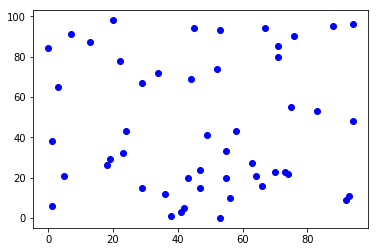

In [25]:
import math
import random
n = 50
todos = range(n)
otros = range(1,n)
random.seed(12345)
points = [(random.randint(0,100),random.randint(0,100)) for i in range(n)]
EPS = 0.001

# calculate Euclidean distance and round-towards-zero (truncate)
def distance(points, i, j):
    dx = points[i][0] - points[j][0]
    dy = points[i][1] - points[j][1]
    return math.floor(math.sqrt(dx*dx + dy*dy))

# Dictionary of Euclidean distance between each pair of points
dist = {(i,j) : distance(points,i,j) for i in range(n) for j in range(i)}

dibuja({})

Resolvamos el TSP simétrico mediante un algoritmo iterativo que elimina un subciclo en cada iteración mirando la solución entera:

Costo total = 582
Time =  0.015628814697265625 seconds
Optimal path: [(5, 4), (10, 0), (12, 0), (13, 10), (16, 11), (17, 1), (19, 6), (20, 1), (23, 20), (25, 16), (28, 8), (28, 24), (29, 9), (29, 25), (30, 11), (30, 27), (31, 3), (31, 8), (32, 12), (33, 18), (33, 22), (34, 26), (35, 6), (35, 14), (36, 21), (36, 32), (37, 7), (37, 21), (38, 17), (39, 7), (39, 27), (40, 9), (40, 14), (41, 15), (42, 18), (42, 26), (43, 15), (43, 38), (44, 3), (44, 13), (45, 2), (45, 5), (46, 2), (46, 19), (47, 34), (47, 41), (48, 23), (48, 24), (49, 4), (49, 22)]


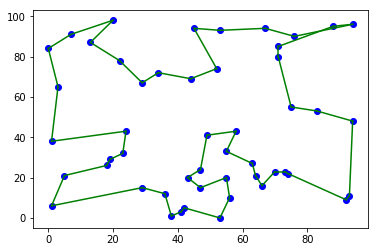

In [26]:
modelo = Model()
x = modelo.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='e')

def SEC():
    vals = modelo.getAttr('x', x)
    G = networkx.Graph()
    G.add_edges_from( (i,j) for i,j in vals.keys() if vals[i,j]>EPS )
    Components = list(networkx.connected_components(G))
    if len(Components) == 1:
        return False
    for S in Components:
        modelo.addConstr( quicksum( x[i,j] for i in S for j in S if j<i) <= len(S)-1 )
    return True

def TSP1():
    modelo.addConstrs( x.sum(i,'*') + x.sum('*',i) == 2 for i in todos )

    modelo.Params.OutputFlag = 0

    modelo.optimize()
    while SEC():
        modelo.optimize()

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x)
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    dibuja(selected)
    
TSP1()

Podemos hacer algo incluso mejor: resolvemos primero el nodo raiz asegurándonos de eliminar los primeros subciclos, y luego continuar igual pero con las soluciones enteras:
    

Costo total = 582
Time =  0.0 seconds
Optimal path: [(5, 4), (10, 0), (12, 0), (13, 10), (16, 11), (17, 1), (19, 6), (20, 1), (21, 12), (23, 20), (25, 16), (28, 8), (28, 24), (29, 9), (29, 25), (30, 11), (30, 27), (31, 3), (31, 8), (33, 18), (33, 22), (34, 26), (35, 6), (35, 14), (36, 21), (36, 32), (37, 7), (37, 32), (38, 17), (39, 7), (39, 27), (40, 9), (40, 14), (41, 15), (42, 18), (42, 26), (43, 15), (43, 38), (44, 3), (44, 13), (45, 2), (45, 5), (46, 2), (46, 19), (47, 34), (47, 41), (48, 23), (48, 24), (49, 4), (49, 22)]


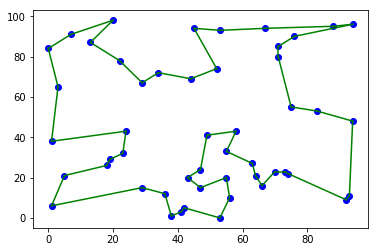

In [27]:
modelo = Model()
x = modelo.addVars(dist.keys(), lb=0.0, ub=1.0, obj=dist, vtype=GRB.CONTINUOUS, name='e')

def SEC1():
    vals = modelo.getAttr('x', x)
    G = networkx.Graph()
    G.add_edges_from( (i,j) for i,j in vals.keys() if vals[i,j]>EPS)
    Components = list(networkx.connected_components(G))
    if len(Components) == 1:
        return False
    for S in Components:
        modelo.addConstr( quicksum( x[i,j] for i in S for j in S if j<i) <= len(S)-1 )
    return True
    
def SEC2():
    vals = modelo.getAttr('x', x)
    G = networkx.Graph()
    for i,j in vals.keys():
        if vals[i,j]>EPS:
            G.add_edge( i, j, capacity = vals[i,j] )
           
    corte = False
    free = [True]*n
    for i in otros :
        if free[i]:
            cut_value, partition = networkx.minimum_cut(G, 0, i)
            if cut_value < 2-EPS:
                non_S, S = partition
                modelo.addConstr( quicksum( x[i,j] for i in S for j in S if j<i) <= len(S)-1 ) 
                corte = True
                for j in S: free[j] = False
    return corte

def TSP2():
    modelo.addConstrs( x.sum(i,'*') + x.sum('*',i) == 2 for i in todos )

    modelo.Params.OutputFlag = 0

    modelo.optimize()
    while SEC2():
        modelo.optimize()
        
    for v in modelo.getVars(): v.vtype = GRB.BINARY     # antes problemas continuos ; después problemas enteros
    
    modelo.optimize()
    while SEC1():
        modelo.optimize()

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x)
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    dibuja(selected)
    
TSP2()

Resolvamos ahora el mismo TSP simétrico pero insertando cortes sobre todas las soluciones enteras que va encontrando también durante el proceso. Para esto necesitamos utilizar las llamadas funciones "callback":

Costo total = 582
Time =  0.08652877807617188 seconds
Optimal path: [(5, 4), (10, 0), (12, 0), (13, 10), (16, 11), (17, 1), (19, 6), (20, 1), (23, 20), (25, 16), (28, 8), (28, 24), (29, 9), (29, 25), (30, 11), (30, 27), (31, 3), (31, 8), (32, 12), (33, 18), (33, 22), (34, 26), (35, 6), (35, 14), (36, 21), (36, 32), (37, 7), (37, 21), (38, 17), (39, 7), (39, 27), (40, 9), (40, 14), (41, 15), (42, 18), (42, 26), (43, 15), (43, 38), (44, 3), (44, 13), (45, 2), (45, 5), (46, 2), (46, 19), (47, 34), (47, 41), (48, 23), (48, 24), (49, 4), (49, 22)]


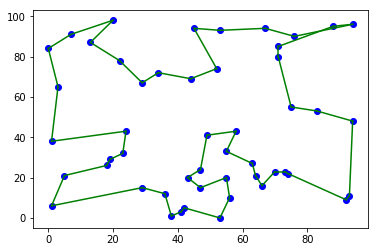

In [28]:
modelo = Model()
x = modelo.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='e')

def cbSEC1(modelo, where):
    if where == GRB.Callback.MIPSOL:
        vals = modelo.cbGetSolution(x)           
        G = networkx.Graph()
        G.add_edges_from( (i,j) for i,j in vals.keys() if vals[i,j]>EPS )
        Components = list(networkx.connected_components(G))
        if len(Components) == 1:
            return False
        for S in Components:
            modelo.cbLazy( quicksum( x[i,j] for i in S for j in S if j<i) <= len(S)-1 )
    return True

def TSP3():
    modelo.addConstrs( x.sum(i,'*') + x.sum('*',i) == 2 for i in todos )

    modelo.Params.OutputFlag = 0
    modelo.Params.lazyConstraints = 1
    modelo.optimize(cbSEC1)

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x)
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > EPS]
    print('Optimal path: %s' % str(selected))
    dibuja(selected)
    
TSP3()

Por último, resolvamos el mismo problema pero evaluando el corte también sobre cada solución fraccionaria, lo que requiere calcular un "min-cut problem":

Costo total = 582
Time =  0.1797008514404297 seconds
Optimal path: [(5, 4), (10, 0), (12, 0), (13, 10), (16, 11), (17, 1), (19, 6), (20, 1), (21, 12), (23, 20), (25, 16), (28, 8), (28, 24), (29, 9), (29, 25), (30, 11), (30, 27), (31, 3), (31, 8), (33, 18), (33, 22), (34, 26), (35, 6), (35, 14), (36, 21), (36, 32), (37, 7), (37, 32), (38, 17), (39, 7), (39, 27), (40, 9), (40, 14), (41, 15), (42, 18), (42, 26), (43, 15), (43, 38), (44, 3), (44, 13), (45, 2), (45, 5), (46, 2), (46, 19), (47, 34), (47, 41), (48, 23), (48, 24), (49, 4), (49, 22)]


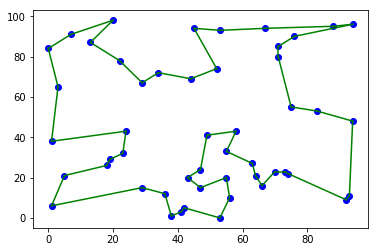

In [29]:
modelo = Model()
x = modelo.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='e')

def cbSEC2(modelo, where):
    corte = False
    if where == GRB.Callback.MIPSOL:
        vals = modelo.cbGetSolution(x)     # verificar UB solutions      
        G = networkx.Graph()
        G.add_edges_from( (i,j) for i,j in vals.keys() if vals[i,j]>EPS )
        Components = list(networkx.connected_components(G))
        if len(Components) == 1:
            return False
        for S in Components:
            modelo.cbLazy( quicksum( x[i,j] for i in S for j in S if j<i) <= len(S)-1 )
            corte = True
        
    if where == GRB.Callback.MIPNODE:
        vals = modelo.cbGetNodeRel(x)      # verificar LB solutions
        G = networkx.Graph()
        for i,j in vals.keys():
            if vals[i,j]>EPS:
                G.add_edge( i, j, capacity = vals[i,j] )
            
        free = [True]*n
        for i in otros :
            if free[i]:
                cut_value, partition = networkx.minimum_cut(G, 0, i)
                if cut_value < 2-EPS:
                    non_S, S = partition
                    modelo.cbLazy( quicksum( x[i,j] for i in S for j in S if j<i) <= len(S)-1 ) 
                    corte = True
                    for j in S: free[j] = False
    return corte

def TSP4():
    modelo.addConstrs( x.sum(i,'*') + x.sum('*',i) == 2 for i in todos )

    modelo.Params.OutputFlag = 0
    modelo.Params.lazyConstraints = 1
    modelo.optimize(cbSEC2)

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x)
    selected = [(i,j) for i,j in vals.keys() if vals[i,j] > 0.5]
    print('Optimal path: %s' % str(selected))
    dibuja(selected)

TSP4()

# TSP con ventanas temporales

# TSP múltiple

# TSP con varias pilas

# TSP con visitas consistentes

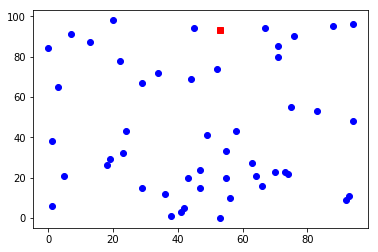

miramos subtours
miramos subtours
miramos subtours
miramos subtours
miramos consistencia
maximo= 155 kk= 46 pp= 0 qq= 3 lengthpp= 253 lengthqq= 98
miramos subtours
miramos subtours
miramos subtours
miramos consistencia
maximo= 365 kk= 10 pp= 1 qq= 2 lengthpp= 373 lengthqq= 8
miramos subtours
miramos consistencia
maximo= 324 kk= 12 pp= 0 qq= 2 lengthpp= 14 lengthqq= 338
miramos subtours
miramos consistencia
maximo= 317 kk= 12 pp= 0 qq= 3 lengthpp= 14 lengthqq= 331
miramos subtours
miramos consistencia
maximo= 70 kk= 22 pp= 1 qq= 3 lengthpp= 225 lengthqq= 155
miramos subtours
miramos consistencia
maximo= 122 kk= 6 pp= 1 qq= 2 lengthpp= 147 lengthqq= 269
miramos subtours
miramos subtours
miramos subtours
miramos consistencia
maximo= 62 kk= 45 pp= 1 qq= 3 lengthpp= 130 lengthqq= 192
miramos subtours
miramos subtours
miramos consistencia
maximo= 61 kk= 43 pp= 1 qq= 2 lengthpp= 138 lengthqq= 77
miramos subtours
miramos consistencia
maximo= 49 kk= 1 pp= 0 qq= 2 lengthpp= 146 lengthqq= 97
mira

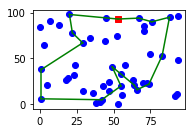

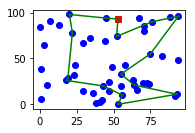

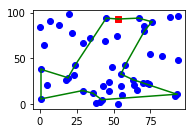

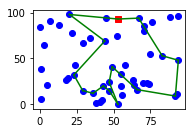

In [15]:
m = 4   # number of days
n = 50  # number of locations
ñ = 15  # number of customers in each day
L = 30  # maximum difference for consistency
EPS = 0.001

days      = range(m)
locations = range(n)
customers = range(1,n)

import random
random.seed(12345)
points = [(random.randint(0,100),random.randint(0,100)) for i in range(n)]

V = {}
D = {}
for i in customers: D[i] = []
for d in days:
    V[d] = random.sample(customers,ñ)
    for i in V[d]: D[i].append(d)
    V[d].append(0)
     
import math
def distance(points, i, j):
    dx = points[i][0] - points[j][0]
    dy = points[i][1] - points[j][1]
    return math.floor(math.sqrt(dx*dx + dy*dy))

dist = {(i,j) : distance(points,i,j) for i in locations for j in locations if i!=j}

import matplotlib.pyplot as plt
def dibuja(selected):                #dibuja una ruta dada como una lista de arcos
    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
    plt.plot( points[0][0] , points[0][1] , 'rs')
    for (i,j) in selected:
        plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')
    plt.show()
        
dibuja({})
from gurobipy import *

modelo = Model()
x = tupledict()
for d in days:
    for i in V[d]:
        for j in V[d]:
            if i!=j :
                x[i,j,d] = modelo.addVar(obj=dist[i,j], vtype=GRB.BINARY, name='a[%d,%d,%d]'%(i,j,d))
f = tupledict()

import networkx as nx
                
def SEC():
    print("miramos subtours")
    corte = False
    vals = modelo.getAttr('x', x)
    for d in days:
        G = nx.Graph()
        G.add_edges_from( (i,j) for i in V[d] for j in V[d] if i!=j and vals[i,j,d]>EPS )
        Components = list(nx.connected_components(G))
        if len(Components) > 1:
            for S in Components:
                modelo.addConstr( quicksum( x[i,j,d] for i in S for j in S if i!=j ) <= len(S)-1 )
                corte = True
    return corte  


def Consistency():
    print( "miramos consistencia")
    vals = modelo.getAttr('x', x)
    length = {}
    for d in days:
        G = nx.DiGraph()
        G.add_weighted_edges_from( (i,j,dist[i,j]) for i in V[d] for j in V[d] if i!=j and vals[i,j,d]>EPS )
        for i in V[d]:
            length[i,d] = nx.dijkstra_path_length(G,source=0,target=i)
        G.clear()
    maximo = 0
    for i in customers:
        for p in D[i]:
            for q in D[i]:
                if p<q and maximo < abs(length[i,p]-length[i,q])  :
                    maximo = abs(length[i,p]-length[i,q])
                    kk = i
                    pp = p
                    qq = q
    print( "maximo=",maximo , "kk=",kk,"pp=",pp,"qq=",qq, "lengthpp=",length[kk,pp],"lengthqq=",length[kk,qq])
    if maximo <= L :
        return False

      
    for i in V[pp]:
        for j in V[pp]:
            if i!=j:
                f[i,j,kk,pp] = modelo.addVar(obj=0, vtype=GRB.BINARY, name='f[%d,%d,%d,%d]'%(i,j,kk,pp))
    for i in V[qq]:
        for j in V[qq]:
            if i!=j:
                f[i,j,kk,qq] = modelo.addVar(obj=0, vtype=GRB.BINARY, name='f[%d,%d,%d,%d]'%(i,j,kk,qq))
        
    modelo.addConstr(sum(f[0,j,kk,pp] for j in V[pp] if j!=0 ) == 1)
    modelo.addConstr(sum(f[j,0,kk,pp] for j in V[pp] if j!=0 ) == 0)
    modelo.addConstrs(sum(f[j,i,kk,pp]-f[i,j,kk,pp] for j in V[pp] if j!=i) == 0 for i in V[pp] if i!=kk and i!=0 )
    modelo.addConstrs( f[i,j,kk,pp] <= x[i,j,pp] for i in V[pp] for j in V[pp] if i!=j )

    modelo.addConstr(sum(f[0,j,kk,qq] for j in V[qq] if j!=0 ) == 1)
    modelo.addConstr(sum(f[j,0,kk,qq] for j in V[qq] if j!=0 ) == 0)
    modelo.addConstrs(sum(f[j,i,kk,qq]-f[i,j,kk,qq] for j in V[qq] if j!=i) == 0 for i in V[qq] if i!=kk and i!=0 )
    modelo.addConstrs( f[i,j,kk,qq] <= x[i,j,qq] for i in V[qq] for j in V[qq] if i!=j )
     
    modelo.addConstr( sum(dist[i,j]*f[i,j,kk,pp] for i in V[pp] for j in V[pp] if i!=j ) - sum(dist[i,j]*f[i,j,kk,qq] for i in V[qq] for j in V[qq] if i!=j ) <= L)
    modelo.addConstr( sum(dist[i,j]*f[i,j,kk,pp] for i in V[pp] for j in V[pp] if i!=j ) - sum(dist[i,j]*f[i,j,kk,qq] for i in V[qq] for j in V[qq] if i!=j ) >= -L)

    return True


def CATSPsec():
    modelo.addConstrs(sum(x[i,j,k] for j in V[k] if j!=i) == 1 for k in days for i in V[k] )
    modelo.addConstrs(sum(x[j,i,k] for j in V[k] if j!=i) == 1 for k in days for i in V[k] )

    modelo.Params.OutputFlag = 0

    modelo.optimize()
    while SEC() or Consistency():
        modelo.optimize()    
        if modelo.status != GRB.Status.OPTIMAL:
            print(' No solution ; status=',modelo.status)
            return

    print('Costo total = %g' % modelo.objVal)
    print('Time = ',modelo.Runtime, "seconds")
    vals = modelo.getAttr('x', x)
    selected = [(i,j,k) for i,j,k in vals.keys() if vals[i,j,k] > EPS]
    print('Optimal path: %s' % str(selected))
    for k in days: 
        plt.subplot(2, 2, k+1)
        selected = [ (i,j) for i in V[k] for j in V[k] if i!=j and vals[i,j,k]>EPS]
        dibuja(selected)
        
CATSPsec()